In [328]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer

import re
import json
import glob
import pickle

from sklearn.datasets import fetch_20newsgroups

In [275]:
data_20 = fetch_20newsgroups()

In [282]:
data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR', 'description'])

In [225]:
# Evaluate
def get_metrics(y_true, y_pred, metric=[f1_score]):
    for m in metric:
        metric_name = s = re.search('\s\S+\s', str(m)).group(0).strip()
        print(f'{metric_name:30}== {m(y_true, y_pred):.4f}')
    print('\n')
    print(classification_report(y_true, y_pred))
    print('\n')
    # Create conf mtrx
    mtrx = confusion_matrix(y_true, y_pred)
    sns.heatmap(mtrx.T, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.title('Confusion matrix')
    plt.show()

# Classify news
https://subscription.packtpub.com/video/big_data_and_business_intelligence/9781789139938/55447/55450/building-a-pipeline-in-scikit-learn-to-categorize-news-articles?_ga=2.16886897.91507475.1551257334-962806803.1550495454

## Get the data

In [183]:
path = r'C:\Users\aleksander.molak\Documents\EDU\9781789139938_Code\data'
financ = r'C:\Users\aleksander.molak\Documents\EDU\9781789139938_Code\data\financial_news'

In [184]:
with open(str(financ)+r'\2017_01\blogs_0000001.json', 'r') as file:
    d = json.loads(file.read())

In [185]:
d.keys()

dict_keys(['organizations', 'uuid', 'thread', 'author', 'url', 'ord_in_thread', 'title', 'locations', 'entities', 'highlightText', 'language', 'persons', 'text', 'external_links', 'published', 'crawled', 'highlightTitle'])

In [186]:
d['text'][:200]

"by Gary Susman \nSure, 2016's domestic box office did hit a record $11.3 billion, up a modest 1.7 percent from 2015's record take. But that doesn't account for the inflation in the average ticket price"

In [187]:
def get_text(f):
    with open(f, 'r') as file:
        try:
            d = json.loads(file.read())
            return d['text']
        except UnicodeDecodeError:
            pass

## Structure the data

In [188]:
# Map texts to lists
# finance_texts = list(map(get_text, glob.glob(str(path) + r'\financial_news\*\blog*json')))

In [189]:
# tech_texts = list(map(get_text, glob.glob(str(path) + r'\tech_news\*\blog*json')))

In [190]:
# Create a data frame
# data = pd.DataFrame({'text': finance_texts, 'class': 'finance'})

In [191]:
# data = data.append(pd.DataFrame({'text': tech_texts, 'class': 'tech'}))

In [283]:
data = pd.DataFrame({'text': data_20.data, 'class': data.target})

## Examine the data

In [284]:
data.shape

(11314, 2)

In [285]:
data.sample(10)

,text,class
10354,From: philly@bach.udel.edu (Robert C Hite)\nSu...,9
6564,From: maynard@leah.msc.cornell.edu (Maynard J....,4
3978,From: pooder@rchland.vnet.ibm.com (Don Fearn)\...,8
8945,From: mrw54660@eng-nxt01.cso.uiuc.edu (Michael...,2
362,From: cook@varmit.mdc.com (Layne Cook)\nSubjec...,14
5993,From: cramer@optilink.COM (Clayton Cramer)\nSu...,18
2126,From: aas7@po.CWRU.Edu (Andrew A. Spencer)\nSu...,7
6297,From: drickel@bounce.mentorg.com (Dave Rickel)...,14
5243,From: fist@iscp.bellcore.com (Richard Pierson)...,8
2693,Subject: Marching Cubs\nFrom: abild@bert.cs.by...,1


In [289]:
data['class'].value_counts()[:5]

10    600
15    599
8     598
9     597
11    595
Name: class, dtype: int64

## Preprocess the data

In [291]:
data = data[(data['class'] == 10) | (data['class'] == 15) ]

In [301]:
data['class'] = data['class'].map({10: 0, 15: 1})

In [302]:
data.head(3)

,text,class
21,From: leunggm@odin.control.utoronto.ca (Gary L...,0
28,From: jonh@david.wheaton.edu (Jonathan Hayward...,1
35,From: dchhabra@stpl.ists.ca (Deepak Chhabra)\n...,0


In [303]:
data.shape

(1199, 2)

## Build a pipeline

In [304]:
# Create steps for the pipeline 
steps = [
         ('trnsfrm', TfidfVectorizer()),
         ('clf', MultinomialNB())
]

In [305]:
# Instantiate the pipeline
pipe = Pipeline(steps)

## Split the data and train

In [306]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['class'], 
                                                    test_size=.25)

In [307]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('trnsfrm', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [308]:
pred = pipe.predict(X_test)

## Eval the baseline model

f1_score                      == 0.9879


             precision    recall  f1-score   support

          0       0.99      0.99      0.99       135
          1       0.99      0.99      0.99       165

avg / total       0.99      0.99      0.99       300





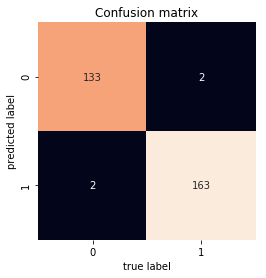

In [309]:
get_metrics(y_test, pred)

## Grid search

In [321]:
param_grid = dict(trnsfrm__min_df = [0, 2, 3, 4, 5], 
                  trnsfrm__ngram_range=[(1,1), (1,2), (1,3)])

In [322]:
grid_search = GridSearchCV(pipe, param_grid=param_grid,
                          scoring=make_scorer(f1_score), n_jobs=-1)

In [323]:
res = grid_search.fit(data['text'], data['class'])

In [324]:
print(f'Best score: {res.best_score_}\nBest params:\n{res.best_params_}')

Best score: 0.9941617702249922
Best params:
{'trnsfrm__min_df': 4, 'trnsfrm__ngram_range': (1, 1)}


In [364]:
pipe_final = Pipeline([('trnsfrm', TfidfVectorizer(min_df=4)), ('clf', MultinomialNB())])

In [365]:
pipe_final.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('trnsfrm', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=4,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

## Pickle the model

In [366]:
# Pickle
pickle.dump(pipe_final, open('clf_news_pipe.pkl', 'wb'))

In [367]:
# Sanity 
dfg = pickle.load(open('clf_news_pipe.pkl', 'rb'))

In [368]:
dfg_pred = dfg.predict(X_test)

f1_score                      == 0.9879


             precision    recall  f1-score   support

          0       0.99      0.99      0.99       135
          1       0.99      0.99      0.99       165

avg / total       0.99      0.99      0.99       300





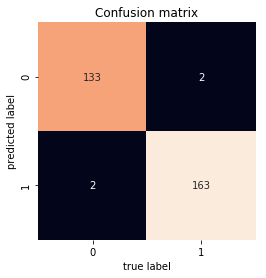

In [369]:
get_metrics(y_test, dfg_pred)